In [1]:
from scipy import signal
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

#Results 1 - can MUs be tracked across tasks and trials for the same participant?

#load all validated and exported motor units trials - all flexion trials, all MUs, all %MVC for one participant
T1_10p = sio.loadmat("C:\\Users\\MSc\\T1_10ptest", squeeze_me=True)
#T1_10p = sio.loadmat("C:\\Users\\danie\\Documents\\Python files\\LJ_Seg1_MVC_Attempt2.mat", squeeze_me=True)
#T1_10p
#T1_10p

print(T1_10p)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: Win32NT, CREATED on: Wed, 21 Sep 2022 12:57:32 GMT', '__version__': '1.0', '__globals__': [], 'SamplingFrequency': 2048.0, 'Data': array([[ -2.2888184 ,  -2.1757903 , -11.797304  , ...,   0.01528586,
          0.017081  ,   0.0340532 ],
       [  9.706285  ,  10.158398  ,  -0.18367061, ...,   0.0198553 ,
          0.02252081,   0.04112495],
       [ 14.241536  ,  14.057866  ,   2.726802  , ...,   0.0169722 ,
          0.02056248,   0.04340967],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]], dtype=float32), 'Time': array([0.        , 0.00048828, 0.00097656, 0.00146484, 0.00195312,
       0.00244141, 0.00292969, 0.00341797, 0.00390625, 0.00439453,
       0.00488

In [23]:
#Reshape to add another dimension (motor unit) (e.g. 127, 2, 64) (time, MUs, channel)
data = T1_10p['Data'].reshape(nt,-1,nchan)
print(data)
print(T1_10p)

#define variables
nt = T1_10p['Data'].shape[0] #nt = extracted number of time points for MU, 0 because time is the first parameter
nchan = 64 #nchan = number of channels
nmu = data.shape[1] #nmu = number of motor units

[[[-2.2888184e+00 -2.1757903e+00 -1.1797304e+01 ... -9.2400446e+00
   -6.1882868e+00  7.1207681e+00]
  [-6.9866735e-03 -9.3802558e-03 -5.0718077e-02 ...  5.5505238e-02
    5.7963513e-02  7.8147240e-02]
  [ 1.1858783e-02  6.9085569e-03 -1.5721047e-02 ...  1.5285862e-02
    1.7080998e-02  3.4053203e-02]]

 [[ 9.7062855e+00  1.0158398e+01 -1.8367061e-01 ...  4.2385526e-02
    2.3877180e+00  1.5527230e+01]
  [ 2.3935826e-02  2.2512615e-02 -1.6108165e-02 ...  7.1613401e-02
    6.8961054e-02  8.9662313e-02]
  [ 1.6373824e-02  9.5196646e-03 -1.4361095e-02 ...  1.9855302e-02
    2.2520807e-02  4.1124951e-02]]

 [[ 1.4241536e+01  1.4057866e+01  2.7268021e+00 ...  3.2636855e+00
    4.2102957e+00  1.7589993e+01]
  [ 4.1920040e-02  4.6965972e-02  1.0738776e-02 ...  7.1872167e-02
    6.7602538e-02  8.6168975e-02]
  [ 1.7407387e-02  1.3653919e-02 -1.3327531e-02 ...  1.6972203e-02
    2.0562476e-02  4.3409672e-02]]

 ...

 [[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
    0.000000

In [22]:
T1_10p_MU1 = np.arange(nmu).reshape(nmu)
print(T1_10p)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: Win32NT, CREATED on: Wed, 21 Sep 2022 12:57:32 GMT', '__version__': '1.0', '__globals__': [], 'SamplingFrequency': 2048.0, 'Data': array([[ -2.2888184 ,  -2.1757903 , -11.797304  , ...,   0.01528586,
          0.017081  ,   0.0340532 ],
       [  9.706285  ,  10.158398  ,  -0.18367061, ...,   0.0198553 ,
          0.02252081,   0.04112495],
       [ 14.241536  ,  14.057866  ,   2.726802  , ...,   0.0169722 ,
          0.02056248,   0.04340967],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]], dtype=float32), 'Time': array([0.        , 0.00048828, 0.00097656, 0.00146484, 0.00195312,
       0.00244141, 0.00292969, 0.00341797, 0.00390625, 0.00439453,
       0.00488

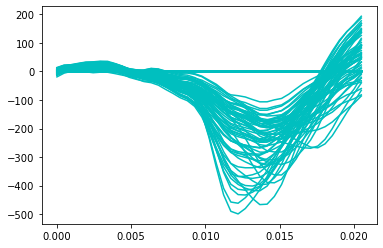

In [45]:
#split array into number of MUs
split = np.array_split(T1_10p['Description'], nmu, axis=0)
#print(split)
split2 = np.array_split(T1_10p['Data'], nmu, axis=0)
#print(split2)
split3 = np.array_split(T1_10p['Time'], nmu, axis=0)
#print(split3)

T1_10p_MU1 = (split[0], split2[0], split3[0])
#print(T1_10p_MU1)
x = split3[0]
y = split2[0]
plt.plot(x,y, 'c')

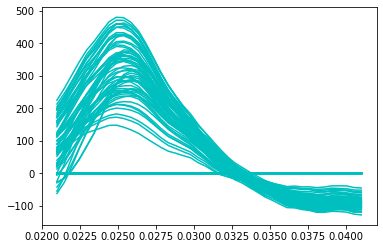

In [51]:
T1_10p_MU2 = (split[1], split2[1], split3[1])
#print(T1_10p_MU2)
#print(T1_10p_MU2)
#T1_10p_MU3 = split[2]
#print(T1_10p_MU3)

x = split3[1]
y = split2[1]
plt.plot(x,y, 'c')

#print(split) #print split array with MUs individually
#print(split[0]) #print MUs alone

#print(nt)
#print(nchan)
#print(nmu)
#print(T1_10p_MU1['Data'])
#print(T1_10p['Time'])
#print(T1_10p['Description'])

#print(T1_10p_MU1['Data'])
#plt.plot(T1_10p_MU1, 'c')
#plt.plot(T1_10p_MU1['Data'], 'c')

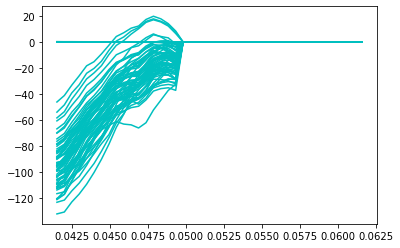

In [52]:
T1_10p_MU3 = (split[2], split2[2], split3[2])
x = split3[2]
y = split2[2]
plt.plot(x,y, 'c')

In [ ]:
plt.plot()

In [35]:
#assign unique ID to all motor units added

import collections
from collections import OrderedDict

ID = OrderedDict()
ID['split[0]'] = T1_10p_MU1
ID['split[1]'] = T1_10p_MU2 
#print(ID)
#print(T1_10p_MU2['Data'])

In [ ]:
#create class to clean up

class Trial(object):
    def __init__(self, filename):
        myfile    = sio.loadmat(filename, squeeze_me=True)
        self.data = myfile['Data']
        nchan     = 64 # nchan = number of channels
        self.nt   = self.data.shape[0] # nt = extracted number of time points for MU, 0 because time is the first parameter
        self.nmu  = self.data.shape[1] # nmu = number of motor units
        self.data = self.data.reshape(self.nt, -1, nchan).transpose(1, 0, 2) #transpose to change orders
       
    
T1_10p_MU1 = Trial("C:\\Users\\MSc\\T1_10ptest")
print(T1_10p_MU1.data)
#seg2 = Segment("C:\\Users\\danie\\Documents\\Python files\\LJ_Seg1_MVC_Attempt2.mat")
#print(seg2.nmu)

In [ ]:
#sort Trials into Motor Units



In [ ]:
#form grid of ID'd motor units



In [ ]:
#run cross correlation on all matches in grid
def my_corrcoef( x, y ):    
    mean_x = np.mean( x )
    mean_y = np.mean( y )
    std_x  = np.std ( x )
    std_y  = np.std ( y )
    n      = np.product( x.shape )
    return signal.correlate( x - mean_x, y - mean_y, mode = 'valid' )[0] / n / ( std_x * std_y )

# Create loop

def compare_mus(segA, segB):
    for iAmu, segAmu in enumerate(segA.data): # nmu, nt, nchan
        for iBmu, segBmu in enumerate(segB.data):
            r = my_corrcoef(segAmu, segBmu)
            print(iAmu, iBmu, r)
            
compare_mus(seg2, seg2)



In [ ]:
#produce table at end showing all cross correlation values


#make all values above 0.8 green